In [10]:
# 21BAI1210 - Yadukrishnan
# Imports 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [11]:
# Watershed Image Processing Function
def watershed_segmentation(image_path):
 img = cv2.imread(image_path)
 gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
 # Thresholding
 ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
 
 # Noise removal
 kernel = np.ones((3, 3), np.uint8)
 opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
 
 # Sure background area
 sure_bg = cv2.dilate(opening, kernel, iterations=3)
 
 # Sure foreground area
 dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
 ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
 
 # Unknown region
 sure_fg = np.uint8(sure_fg)
 unknown = cv2.subtract(sure_bg, sure_fg)
 
 # Marker labelling
 ret, markers = cv2.connectedComponents(sure_fg)
 markers = markers + 1
 markers[unknown == 255] = 0
 
 # Watershed algorithm
 markers = cv2.watershed(img, markers)
 img[markers == -1] = [255, 0, 0]
 
 return img


In [12]:
res = watershed_segmentation('./lenna.png')

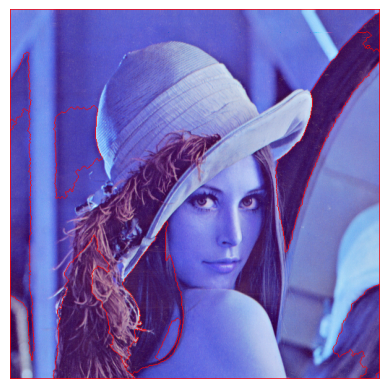

In [13]:
plt.imshow(res)
plt.axis('off')
plt.show() #21BAI1210